In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Assuming the dataset is a typical housing dataset, features might include:**

1. **age**: The age of the individual.
2. **workclass**: The classification of the individual’s type of work.
3. **education**: The highest level of education attained by the individual.
4. **education-num**: The number of years of education.
5. **marital-status**: The marital status of the individual.
6. **occupation**: The type of job performed by the individual.
7. **relationship**: The relationship status within a household.
8. **race**: The race of the individual.
9. **sex**: The gender of the individual.
10. **capital-gain**: The capital gains earned by the individual.
11. **capital-loss**: The capital losses incurred by the individual.
12. **hours-per-week**: The number of hours worked per week.
13. **native-country**: The country of origin of the individual.
14. **income**: The income bracket of the individual (e.g., >50K or <=50K).

In [3]:
#Load the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

# Set plot style
sns.set(style="whitegrid")


In [4]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/adult.csv')
# Display the first few rows of the dataset
print(data.head())


   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
# Get a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Summary statistics of numerical features
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# Data types of all columns
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [9]:
# Checking for missing values
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

**Data Visualization**:- Visualizations to understand the distribution of the features and the relationships between them.
* **Univariate Analysis**
1. Histograms for numerical features.
2. Bar charts for categorical features.

This histogram shows the distribution of wine ratings. The kernel density estimate (KDE) line helps visualize the density of the ratings.

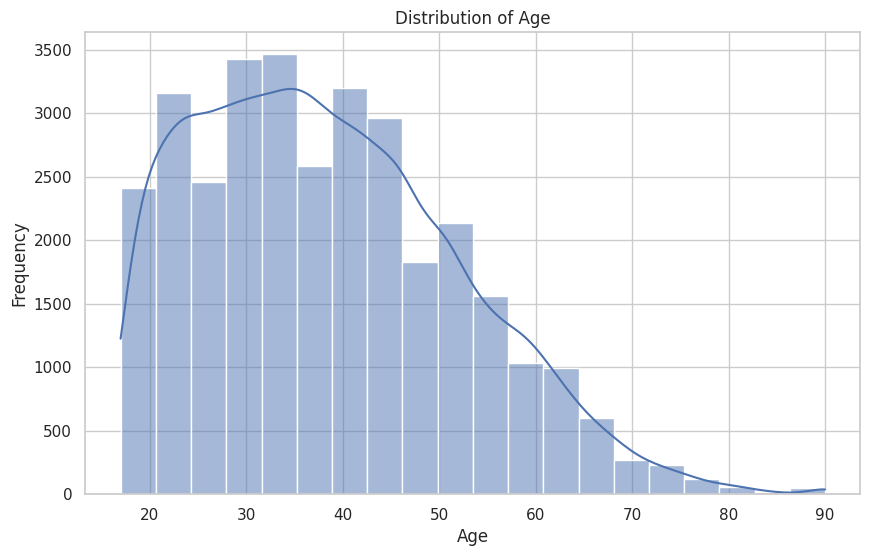

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


This bar chart displays the count of different wine types in the dataset. It helps to understand the distribution of wine types.

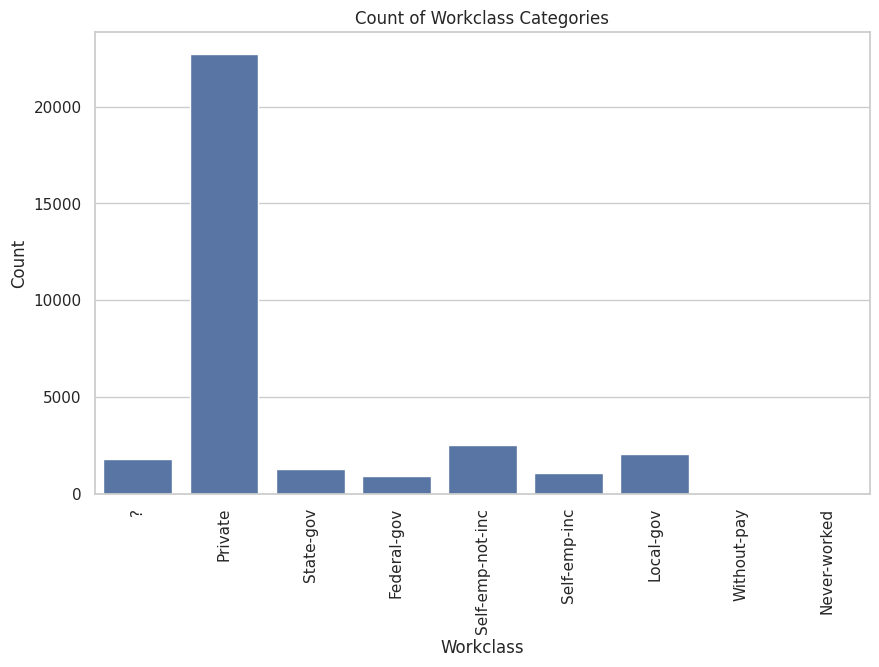

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='workclass')
plt.title('Count of Workclass Categories')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


**Bivariate Analysis**
1. Scatter plots and correlation matrix for numerical features.
2. Box plots for numerical vs. categorical features.

This scatter plot shows the relationship between price and rating, with different colors for different wine types. It helps identify if higher-priced wines tend to have higher ratings.

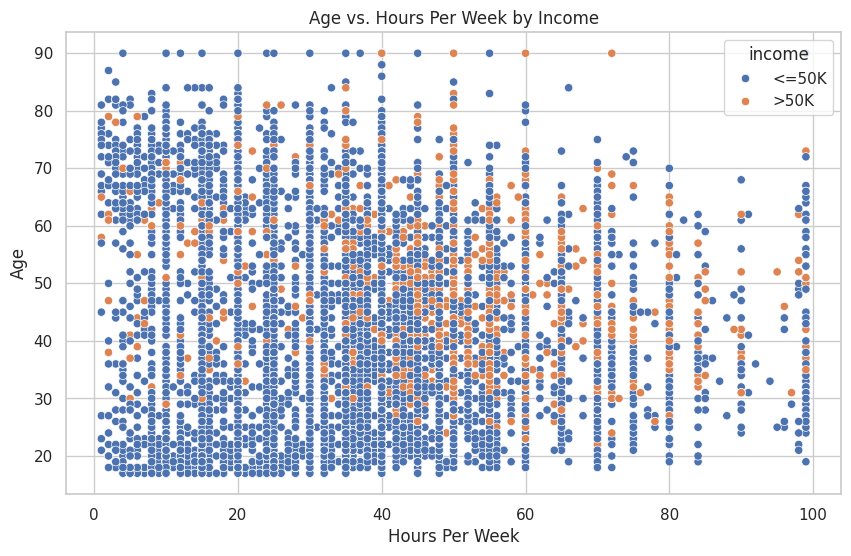

In [19]:
plt.figure(figsize=(10, 6))
# Verify the correct column name and replace 'hours-per-week' if needed
sns.scatterplot(data=data, x='hours.per.week', y='age', hue='income')  # Replace 'hoursperweek' with the actual column name
plt.title('Age vs. Hours Per Week by Income')
plt.xlabel('Hours Per Week')
plt.ylabel('Age')
plt.show()

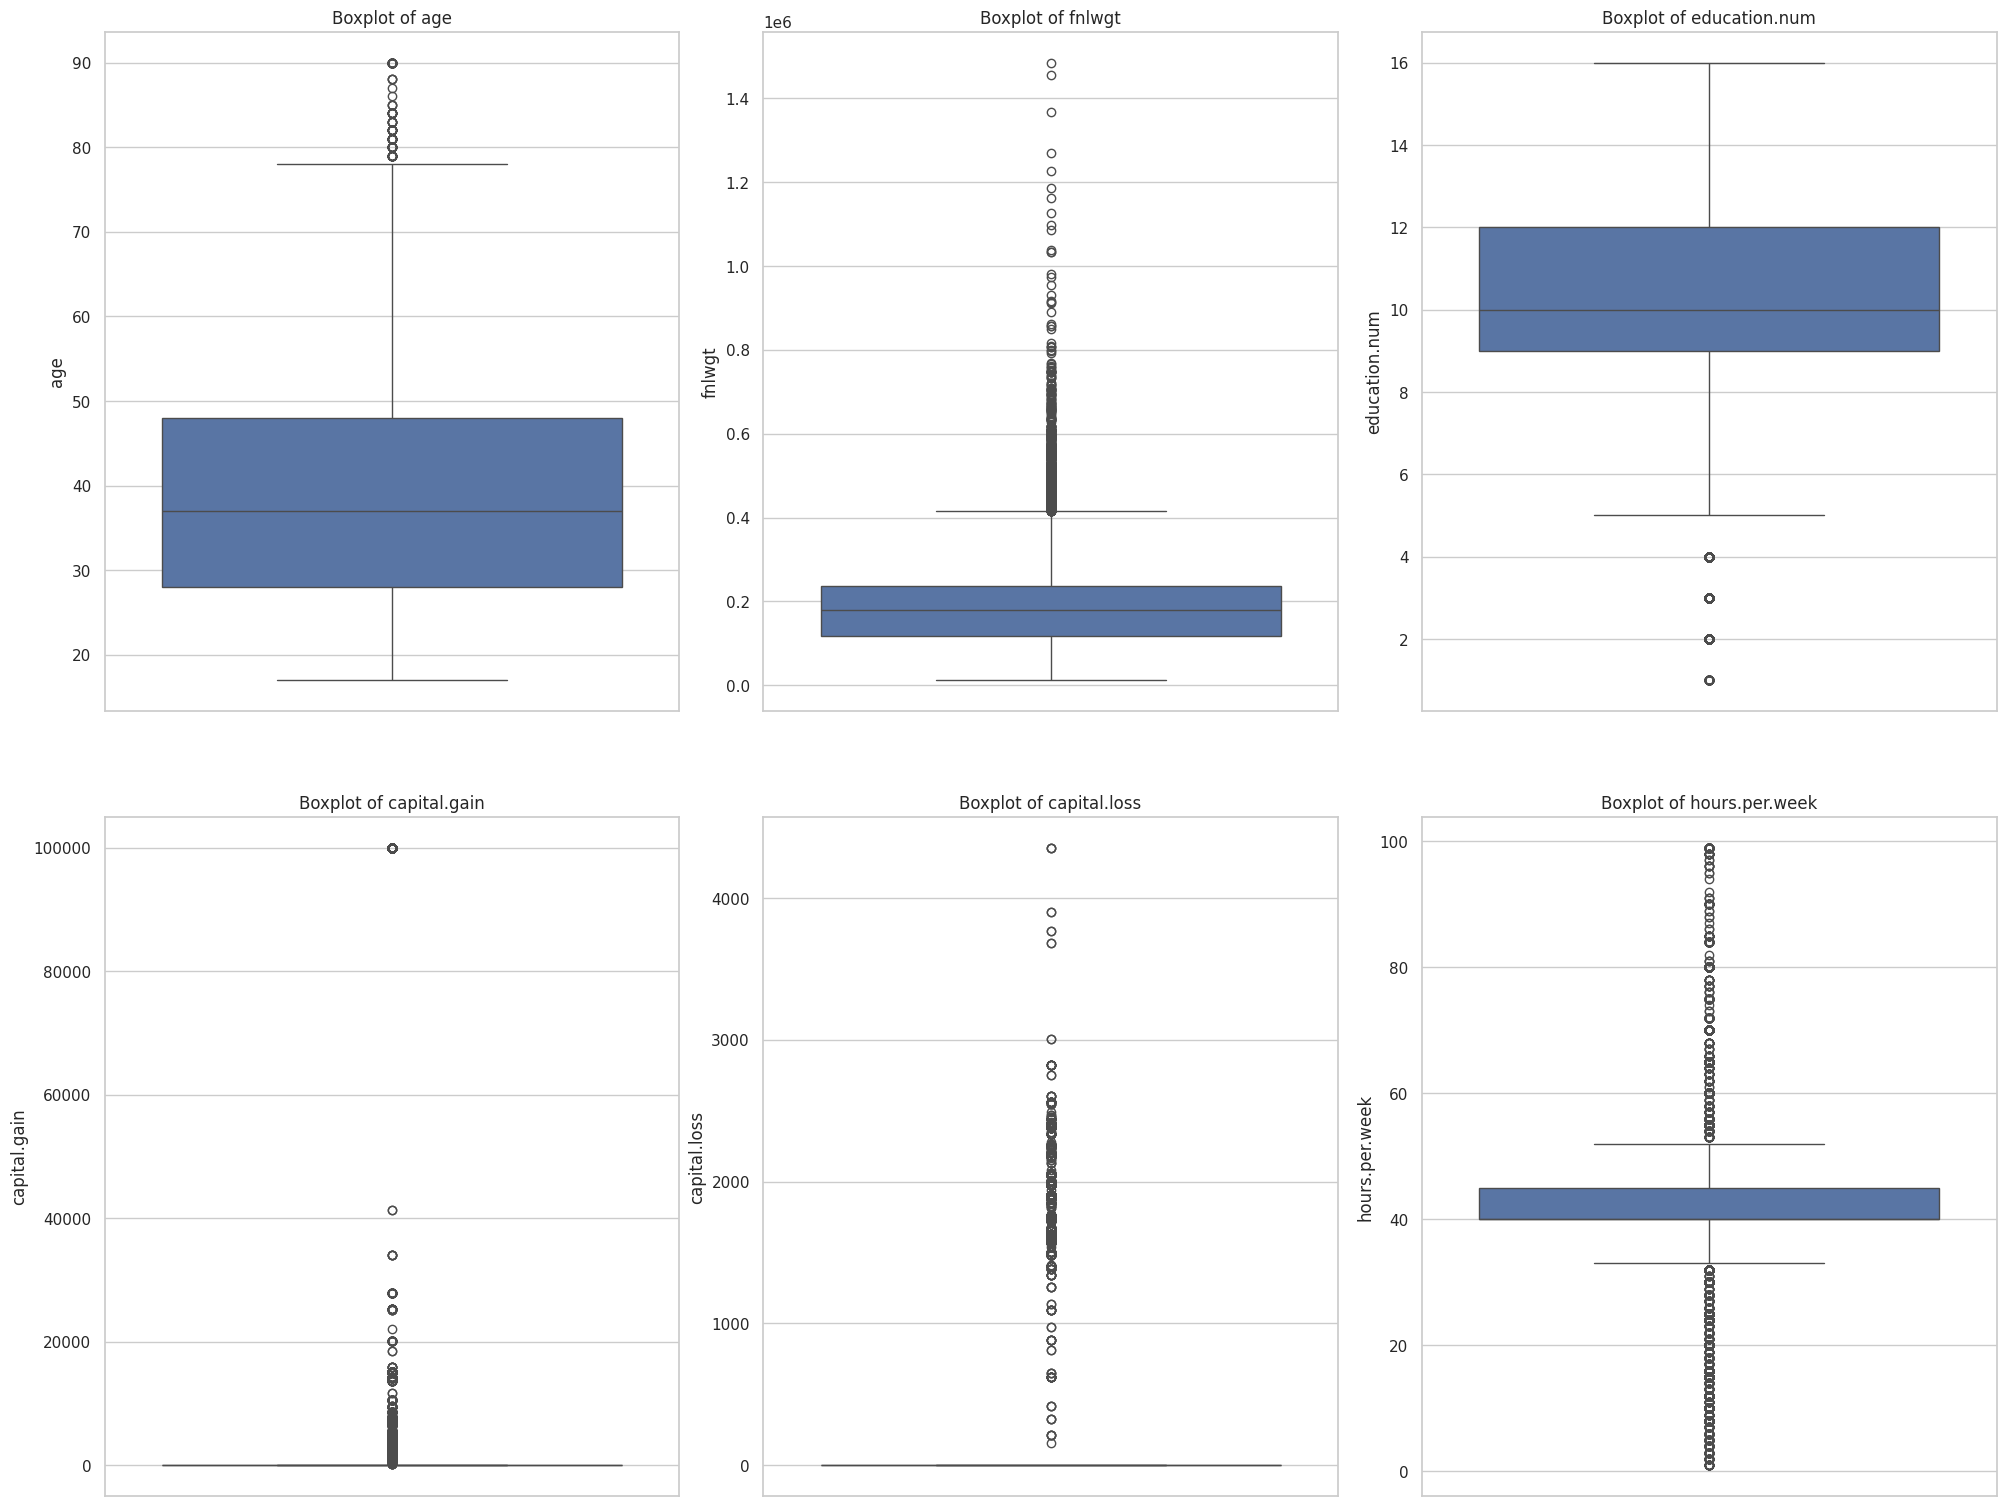

In [29]:
# Boxplot for Different Numeric Features
numeric_features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'] # Correct the column names
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 15))
index = 0
axs = axs.flatten()
for col in numeric_features:
    sns.boxplot(y=col, data=data, ax=axs[index])
    axs[index].set_title(f'Boxplot of {col}')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

This box plot compares the distribution of ratings across different wine types. It highlights the median, quartiles, and potential outliers for each wine type.

**Multivariate Analysis**
1. Pair plots.

The pair plot provides a matrix of scatter plots for the numerical features (rating, price, body, acidity). It helps to observe the relationships between different pairs of features.

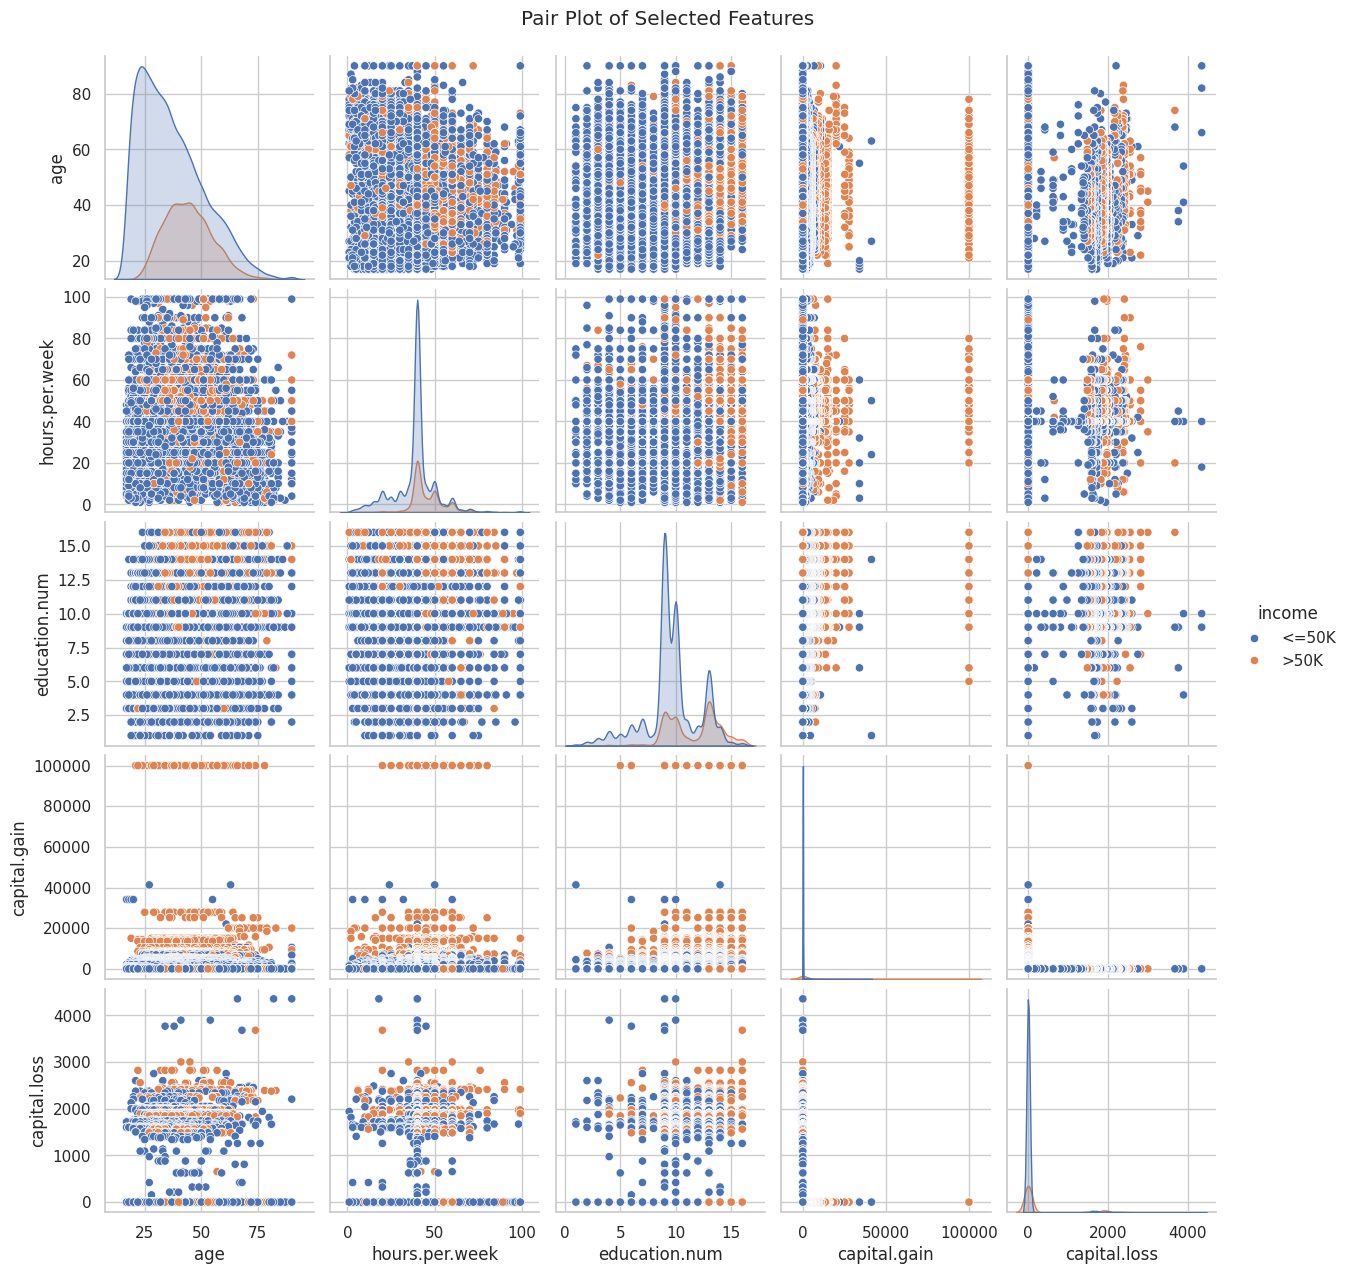

In [26]:
# Pair plot of selected features, including 'type'
sns.pairplot(data[['age', 'hours.per.week', 'education.num', 'capital.gain', 'capital.loss', 'income']], hue='income')
plt.show()

In [24]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

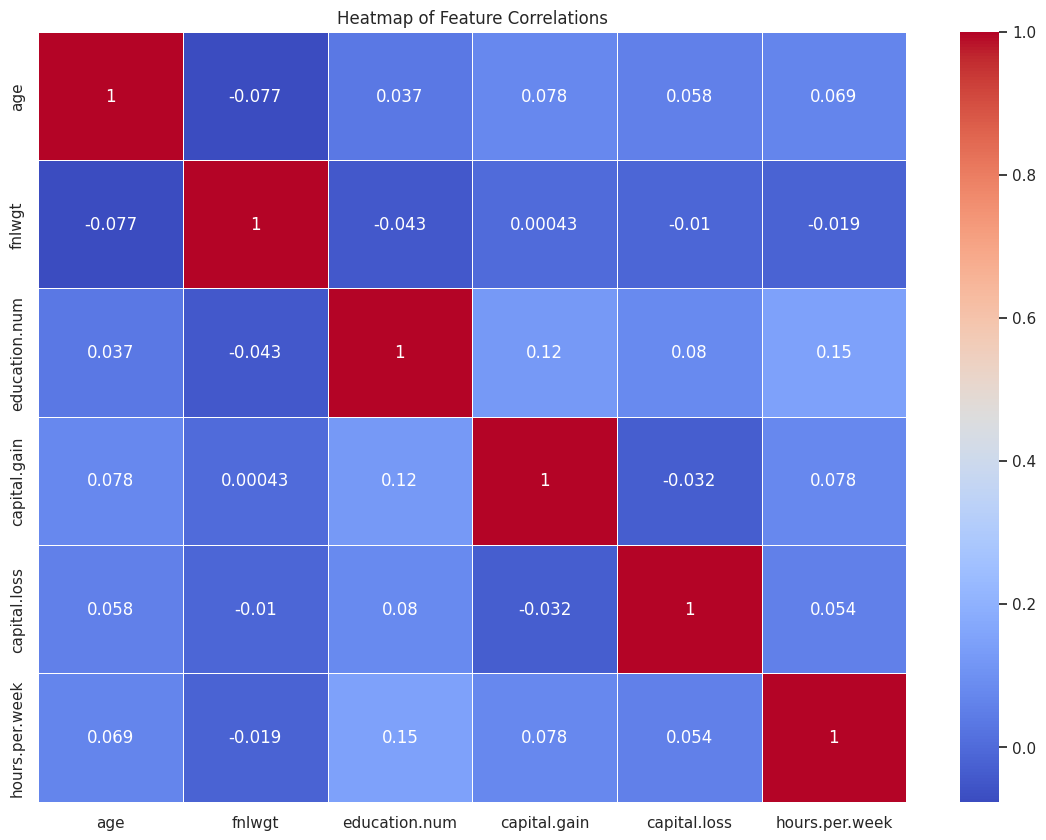

In [27]:
# Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()